<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/pca_in_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)

# Create DataFrame for labels first
df = pd.DataFrame({'label': y})

# Then concatenate the pixel data columns
pixels_df = pd.DataFrame(X)

# Combine label column with pixel data columns
df = pd.concat([df, pixels_df], axis=1)

df.head()


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.sample()


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
68793,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


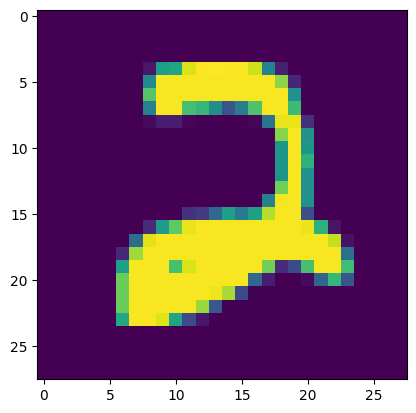

In [25]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[68793,1:].values.reshape(28,28))

In [27]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=(101))
x_train_pca=pca.fit_transform(x_train_scaler)
x_test_pca=pca.transform(x_test_scaler)
x_train_pca.shape

(56000, 101)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [51]:
import time
start=time.time()
y_pred1=knn.predict(x_test_pca)
print(time.time()-start)


12.503925085067749


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)


0.9588571428571429

In [54]:
for i in range(100,110):
  pca=PCA(n_components=i)
  x_train_pca=pca.fit_transform(x_train_scaler)
  x_test_pca=pca.transform(x_test_scaler)
  knn=KNeighborsClassifier()
  knn.fit(x_train_pca,y_train)
  y_pred1=knn.predict(x_test_pca)
  print(i,accuracy_score(y_test,y_pred1))




100 0.9587857142857142
101 0.9588571428571429
102 0.9589285714285715
103 0.9586428571428571
104 0.9580714285714286
105 0.9581428571428572
106 0.9576428571428571
107 0.9578571428571429
108 0.9576428571428571
109 0.9581428571428572


In [58]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train_scaler)
x_test_pca=pca.transform(x_test_scaler)
x_train_pca


array([[ -0.66184663,  -3.52844877],
       [ -2.4256249 ,  -3.51506096],
       [ -3.5671334 ,   4.78236184],
       ...,
       [ -8.34347904,  -1.19630488],
       [ 10.4937875 ,  -9.03606709],
       [ 10.57302752, -12.31764924]])

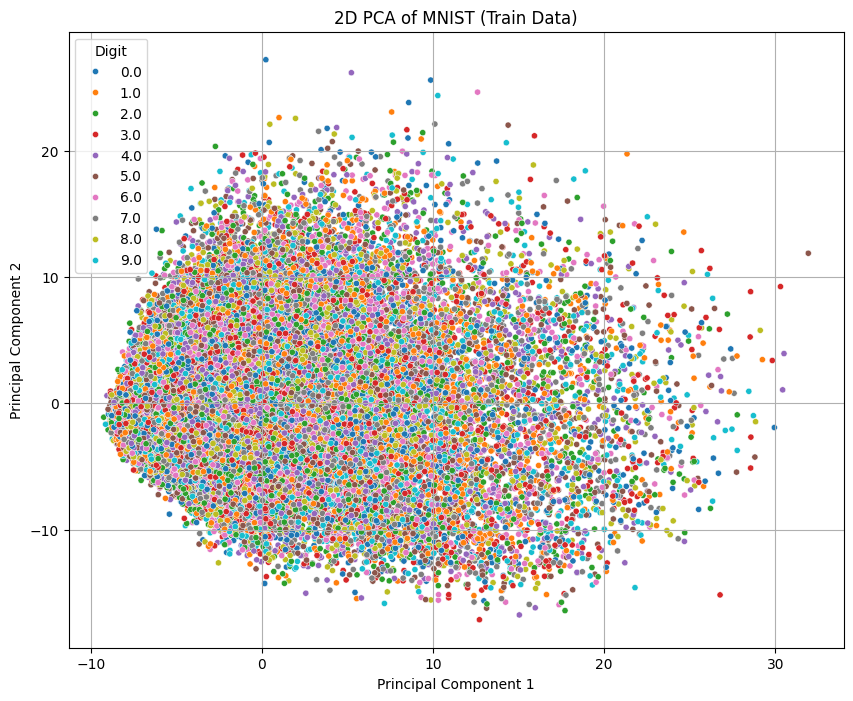

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_pca = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y_train

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='tab10', s=20, legend='full')
plt.title('2D PCA of MNIST (Train Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()
